In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras import models
from keras.layers import Dense

In [29]:
data = pd.read_csv('Train_Data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    908 non-null    float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   Alley          69 non-null     object 
 7   LotShape       1100 non-null   object 
 8   LandContour    1100 non-null   object 
 9   Utilities      1100 non-null   object 
 10  LotConfig      1100 non-null   object 
 11  LandSlope      1100 non-null   object 
 12  Neighborhood   1100 non-null   object 
 13  Condition1     1100 non-null   object 
 14  Condition2     1100 non-null   object 
 15  BldgType       1100 non-null   object 
 16  HouseStyle     1100 non-null   object 
 17  OverallQual    1100 non-null   int64  
 18  OverallC

In [31]:
data = data.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1)

In [32]:
data.shape[0]

1100

In [33]:
columns = data.columns
data_types = data.dtypes
col_counts = data.count()

N = data.shape[0]

obj_cols = []
missing_obj_cols = []
missing_num_cols = []

for i in range(data.shape[1]):  
    if data_types[i]=='object' and col_counts[i]!=N:
        missing_obj_cols.append(columns[i])
        
for i in range(data.shape[1]):        
    if data_types[i]=='object':
        obj_cols.append(columns[i])
        
print(obj_cols)
print(missing_obj_cols)

 
for j in range(data.shape[1]):
    if (data_types[j]=='int64' or data_types[j]=='float64') and col_counts[j]!=N:
        missing_num_cols.append(columns[j])
        
print(missing_num_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


# Filling missing values

In [34]:
for i in missing_obj_cols:
    data[i].fillna('NAN',inplace=True)
    
    

for j in missing_num_cols:
    data[j].fillna(data[j].mean(),inplace=True)

# Converting the data in numerical form

In [35]:
le = LabelEncoder()
cv = CountVectorizer()

    
for i in obj_cols:
    data[i] = le.fit_transform(data[i])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1100 non-null   int64  
 1   MSZoning       1100 non-null   int32  
 2   LotFrontage    1100 non-null   float64
 3   LotArea        1100 non-null   int64  
 4   Street         1100 non-null   int32  
 5   LotShape       1100 non-null   int32  
 6   LandContour    1100 non-null   int32  
 7   Utilities      1100 non-null   int32  
 8   LotConfig      1100 non-null   int32  
 9   LandSlope      1100 non-null   int32  
 10  Neighborhood   1100 non-null   int32  
 11  Condition1     1100 non-null   int32  
 12  Condition2     1100 non-null   int32  
 13  BldgType       1100 non-null   int32  
 14  HouseStyle     1100 non-null   int32  
 15  OverallQual    1100 non-null   int64  
 16  OverallCond    1100 non-null   int64  
 17  YearBuilt      1100 non-null   int64  
 18  YearRemo

In [36]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,4,0,12,2008,8,4,250000


Creating X and Y data

In [37]:
X = data.drop('SalePrice',axis=1)
Y = data['SalePrice']

X_train = X.values
Y_train = Y.values

print(X_train.shape)
print(Y_train.shape)

(1100, 76)
(1100,)


Normalising our data

In [38]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

# Creating our model

In [39]:
model = models.Sequential()

n = X_train.shape

model.add(Dense(20,activation = 'relu',input_shape = (X_train.shape[1],))) 
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1))
               

In [40]:
model.compile(optimizer='rmsprop',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                1540      
_________________________________________________________________
dense_7 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
____________________________________________________

# Fitting the data in the model

In [41]:
x_val = X_train[:400]    #Splitting our data into training and validation
y_val = Y[:400]


x_train = X_train[400:]
y_train = Y[400:]

hist = model.fit(x_train,y_train,epochs=500,batch_size=32,validation_data = (x_val,y_val))

Epoch 1/500
22/22 [==============================] - 0s 10ms/step - loss: 39018745856.0000 - val_loss: 39464054784.0000
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 39018676224.0000 - val_loss: 39463989248.0000
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 39018598400.0000 - val_loss: 39463882752.0000
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 39018459136.0000 - val_loss: 39463694336.0000
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 39018221568.0000 - val_loss: 39463366656.0000
Epoch 6/500
22/22 [==============================] - 0s 3ms/step - loss: 39017795584.0000 - val_loss: 39462817792.0000
Epoch 7/500
22/22 [==============================] - ETA: 0s - loss: 37591187456.000 - 0s 3ms/step - loss: 39017103360.0000 - val_loss: 39461896192.0000
Epoch 8/500
22/22 [==============================] - 0s 3ms/step - loss: 39015952384.0000 - val_loss: 39460352000.0000
Epoch 9/500
2

22/22 [==============================] - 0s 3ms/step - loss: 3891335168.0000 - val_loss: 4385766912.0000
Epoch 70/500
22/22 [==============================] - 0s 3ms/step - loss: 3800492288.0000 - val_loss: 4298338304.0000
Epoch 71/500
22/22 [==============================] - 0s 3ms/step - loss: 3700347904.0000 - val_loss: 4215296512.0000
Epoch 72/500
22/22 [==============================] - 0s 3ms/step - loss: 3608454912.0000 - val_loss: 4131659520.0000
Epoch 73/500
22/22 [==============================] - 0s 3ms/step - loss: 3525297152.0000 - val_loss: 4044187136.0000
Epoch 74/500
22/22 [==============================] - 0s 3ms/step - loss: 3437187072.0000 - val_loss: 3962468096.0000
Epoch 75/500
22/22 [==============================] - 0s 3ms/step - loss: 3356009728.0000 - val_loss: 3880034048.0000
Epoch 76/500
22/22 [==============================] - 0s 3ms/step - loss: 3280878592.0000 - val_loss: 3806101760.0000
Epoch 77/500
22/22 [==============================] - 0s 3ms/step - l

22/22 [==============================] - 0s 3ms/step - loss: 1532809856.0000 - val_loss: 1906939776.0000
Epoch 139/500
22/22 [==============================] - 0s 3ms/step - loss: 1513702528.0000 - val_loss: 1897887232.0000
Epoch 140/500
22/22 [==============================] - 0s 3ms/step - loss: 1506066560.0000 - val_loss: 1886245888.0000
Epoch 141/500
22/22 [==============================] - 0s 3ms/step - loss: 1491441024.0000 - val_loss: 1872368256.0000
Epoch 142/500
22/22 [==============================] - 0s 3ms/step - loss: 1480583040.0000 - val_loss: 1864131840.0000
Epoch 143/500
22/22 [==============================] - 0s 3ms/step - loss: 1476023424.0000 - val_loss: 1844798080.0000
Epoch 144/500
22/22 [==============================] - 0s 3ms/step - loss: 1457405056.0000 - val_loss: 1834679936.0000
Epoch 145/500
22/22 [==============================] - 0s 3ms/step - loss: 1446902016.0000 - val_loss: 1823463808.0000
Epoch 146/500
22/22 [==============================] - 0s 3ms/

Epoch 207/500
22/22 [==============================] - 0s 2ms/step - loss: 1003880064.0000 - val_loss: 1322351872.0000
Epoch 208/500
22/22 [==============================] - 0s 3ms/step - loss: 1006626496.0000 - val_loss: 1310104448.0000
Epoch 209/500
22/22 [==============================] - 0s 3ms/step - loss: 991202304.0000 - val_loss: 1315971840.0000
Epoch 210/500
22/22 [==============================] - 0s 2ms/step - loss: 997187072.0000 - val_loss: 1299546240.0000
Epoch 211/500
22/22 [==============================] - 0s 3ms/step - loss: 986855040.0000 - val_loss: 1293302528.0000
Epoch 212/500
22/22 [==============================] - 0s 3ms/step - loss: 988179968.0000 - val_loss: 1288301824.0000
Epoch 213/500
22/22 [==============================] - 0s 2ms/step - loss: 980463296.0000 - val_loss: 1283754752.0000
Epoch 214/500
22/22 [==============================] - 0s 3ms/step - loss: 975928768.0000 - val_loss: 1279058944.0000
Epoch 215/500
22/22 [==============================] -

22/22 [==============================] - 0s 3ms/step - loss: 771746816.0000 - val_loss: 1070625664.0000
Epoch 277/500
22/22 [==============================] - 0s 3ms/step - loss: 766113792.0000 - val_loss: 1063346432.0000
Epoch 278/500
22/22 [==============================] - 0s 3ms/step - loss: 761425920.0000 - val_loss: 1067892800.0000
Epoch 279/500
22/22 [==============================] - 0s 3ms/step - loss: 763530880.0000 - val_loss: 1069199552.0000
Epoch 280/500
22/22 [==============================] - 0s 3ms/step - loss: 756664704.0000 - val_loss: 1054203072.0000
Epoch 281/500
22/22 [==============================] - 0s 3ms/step - loss: 759324352.0000 - val_loss: 1052487936.0000
Epoch 282/500
22/22 [==============================] - 0s 3ms/step - loss: 754744576.0000 - val_loss: 1048391744.0000
Epoch 283/500
22/22 [==============================] - 0s 3ms/step - loss: 750241344.0000 - val_loss: 1054068992.0000
Epoch 284/500
22/22 [==============================] - 0s 3ms/step - l

22/22 [==============================] - 0s 3ms/step - loss: 635393472.0000 - val_loss: 978670784.0000
Epoch 346/500
22/22 [==============================] - 0s 3ms/step - loss: 633228160.0000 - val_loss: 982550144.0000
Epoch 347/500
22/22 [==============================] - 0s 3ms/step - loss: 633019840.0000 - val_loss: 973920192.0000
Epoch 348/500
22/22 [==============================] - 0s 3ms/step - loss: 628850624.0000 - val_loss: 970912128.0000
Epoch 349/500
22/22 [==============================] - 0s 3ms/step - loss: 630302464.0000 - val_loss: 971238144.0000
Epoch 350/500
22/22 [==============================] - 0s 3ms/step - loss: 625006272.0000 - val_loss: 966463872.0000
Epoch 351/500
22/22 [==============================] - 0s 3ms/step - loss: 625806016.0000 - val_loss: 968276160.0000
Epoch 352/500
22/22 [==============================] - 0s 3ms/step - loss: 623245312.0000 - val_loss: 980358016.0000
Epoch 353/500
22/22 [==============================] - 0s 3ms/step - loss: 623

22/22 [==============================] - 0s 3ms/step - loss: 538911424.0000 - val_loss: 933136320.0000
Epoch 416/500
22/22 [==============================] - 0s 3ms/step - loss: 533715648.0000 - val_loss: 912937024.0000
Epoch 417/500
22/22 [==============================] - 0s 3ms/step - loss: 542278592.0000 - val_loss: 921816128.0000
Epoch 418/500
22/22 [==============================] - 0s 3ms/step - loss: 536908736.0000 - val_loss: 926723264.0000
Epoch 419/500
22/22 [==============================] - 0s 3ms/step - loss: 532125120.0000 - val_loss: 962990592.0000
Epoch 420/500
22/22 [==============================] - 0s 3ms/step - loss: 539071232.0000 - val_loss: 918479104.0000
Epoch 421/500
22/22 [==============================] - 0s 3ms/step - loss: 530853856.0000 - val_loss: 935961472.0000
Epoch 422/500
22/22 [==============================] - 0s 3ms/step - loss: 531958240.0000 - val_loss: 914382848.0000
Epoch 423/500
22/22 [==============================] - 0s 3ms/step - loss: 529

22/22 [==============================] - 0s 3ms/step - loss: 474996352.0000 - val_loss: 915474688.0000
Epoch 486/500
22/22 [==============================] - 0s 3ms/step - loss: 475409792.0000 - val_loss: 915943424.0000
Epoch 487/500
22/22 [==============================] - 0s 3ms/step - loss: 471395968.0000 - val_loss: 917335744.0000
Epoch 488/500
22/22 [==============================] - 0s 2ms/step - loss: 473127328.0000 - val_loss: 935664448.0000
Epoch 489/500
22/22 [==============================] - 0s 3ms/step - loss: 472799040.0000 - val_loss: 901735872.0000
Epoch 490/500
22/22 [==============================] - 0s 3ms/step - loss: 474103488.0000 - val_loss: 905312192.0000
Epoch 491/500
22/22 [==============================] - 0s 2ms/step - loss: 467248896.0000 - val_loss: 930990272.0000
Epoch 492/500
22/22 [==============================] - 0s 2ms/step - loss: 470505824.0000 - val_loss: 913032320.0000
Epoch 493/500
22/22 [==============================] - 0s 3ms/step - loss: 468

Visualising both training and validation loss and accuracy 

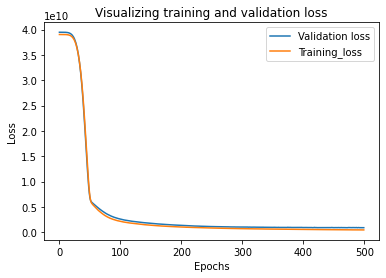

In [57]:
plt.plot(hist.history['val_loss'],label="Validation loss")
plt.plot(hist.history['loss'],label = 'Training_loss')
plt.title("Visualizing training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Making predictions on our training dataset

In [44]:
y = model.predict(x_train)
y

array([[250094.97 ],
       [187397.36 ],
       [106927.5  ],
       [241732.73 ],
       [170111.84 ],
       [155859.08 ],
       [108836.89 ],
       [160013.31 ],
       [301212.5  ],
       [326052.22 ],
       [ 79906.484],
       [147463.14 ],
       [273463.16 ],
       [121205.19 ],
       [226750.42 ],
       [187173.67 ],
       [151443.44 ],
       [212396.81 ],
       [125545.34 ],
       [129691.36 ],
       [210724.92 ],
       [231658.19 ],
       [119341.39 ],
       [317003.75 ],
       [126561.07 ],
       [142224.61 ],
       [281195.94 ],
       [124910.16 ],
       [203817.02 ],
       [191543.03 ],
       [ 89167.23 ],
       [103750.41 ],
       [107354.7  ],
       [188592.58 ],
       [ 92779.19 ],
       [212783.89 ],
       [ 99588.96 ],
       [115138.7  ],
       [ 76464.53 ],
       [117166.75 ],
       [515133.84 ],
       [ 99437.39 ],
       [159435.3  ],
       [205293.55 ],
       [196203.22 ],
       [158743.75 ],
       [202253.73 ],
       [22122

In [45]:
model.evaluate(x_train,y_train)

22/22 [==============================] - 0s 998us/step - loss: 454568640.0000


454568640.0

# Cleaning test dataset

In [46]:
test = pd.read_csv('Test_Data.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [47]:
test1 = test.drop(['Id','Alley','PoolQC','MiscFeature'],axis=1)

In [48]:
#Creating different list of int and object type columns


columns = test1.columns
test_types = test1.dtypes
col_counts = test1.count()

N = test1.shape[0]

objt_cols = []
missing_objt_cols = []
missing_numt_cols = []

for i in range(test1.shape[1]):  
    if test_types[i]=='object' and col_counts[i]!=N:
        missing_objt_cols.append(columns[i])
        
for i in range(test1.shape[1]):        
    if test_types[i]=='object':
        objt_cols.append(columns[i])
        
print(objt_cols)
print(missing_objt_cols)

 
for j in range(test1.shape[1]):
    if (test_types[j]=='int64' or test_types[j]=='float64') and col_counts[j]!=N:
        missing_numt_cols.append(columns[j])
        
print(missing_numt_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


# Filling missing values and converting the data in numerical form

In [49]:
for i in missing_objt_cols:
    test1[i].fillna('NAN',inplace=True)
    
    

for j in missing_numt_cols:
    test1[j].fillna(test[j].mean(),inplace=True)

In [50]:
le = LabelEncoder()
cv = CountVectorizer()

    
for i in objt_cols:
    test1[i] = le.fit_transform(test1[i])




In [51]:
X_test = test1.values
print(X_test.shape)

(360, 76)


In [52]:
ss = StandardScaler()             #Normalising test data
x_test = ss.fit_transform(X_test)

# Making predictions on test dataset

In [53]:
predictions = model.predict(x_test)
predictions[:10]

array([[ 86461.305],
       [123998.16 ],
       [124823.9  ],
       [142026.33 ],
       [118573.34 ],
       [331858.62 ],
       [178142.77 ],
       [242775.78 ],
       [157000.3  ],
       [294141.66 ]], dtype=float32)

In [54]:
pred = predictions.reshape(x_test.shape[0])

Saving our predictions in a csv file

In [56]:
df = pd.DataFrame({'Id':test['Id'],
                   'SalesPrice':pred})     
df.to_csv('House_price_predictions',index = False)

Calculating r2_score

In [55]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y)
score

0.9308391290680236